<a href="https://colab.research.google.com/github/Prakrut/Fraud_Detection/blob/master/Code/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries 

In [8]:
# Python
import pandas as pd
import sys, os
import numpy as np 



# Third-Party
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Custom
from utility import piechart, barchart_categorical, barchart_continuous

# Options
pd.set_option('max_columns',500)
pd.set_option('max_rows',50)


### Data 

In [2]:
path = '../Data'
for i in os.listdir(path):
    print (i)

sample_submission.csv
test_identity.csv
test_transaction.csv
train_identity.csv
train_transaction.csv


In [3]:
train_identity = pd.read_csv(path + '/train_identity.csv')
train_transaction = pd.read_csv(path + '/train_transaction.csv')

In [4]:
train = train_transaction.merge(train_identity,
                                on = 'TransactionID',
                                how = 'left'
                               )

In [5]:
test = pd.merge(pd.read_csv(path + '/test_transaction.csv'),
                pd.read_csv(path + '/test_identity.csv'),
                on = 'TransactionID',
                how = 'left'
               )

In [10]:
test.shape, train.shape

((506691, 433), (590540, 434))

In [6]:
test.columns = test.columns.map(lambda x : x.replace('-','_'))


In [7]:
set(train.columns) - set(test.columns)


{'isFraud'}

In [9]:
train.columns.values

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

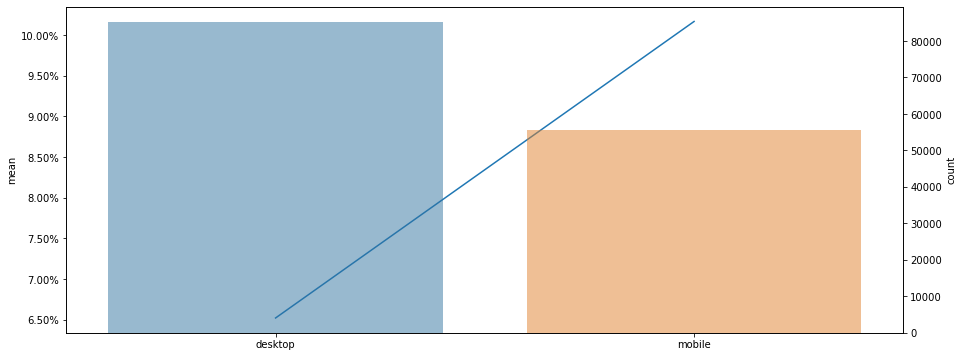

In [12]:
barchart_categorical(train, 'DeviceType', 'isFraud')